In [42]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import CoherenceModel, LdaModel
from gensim import models
from gensim import corpora, models, similarities
from pprint import pprint

from tqdm import tqdm
%matplotlib inline

In [15]:
def GenDictandCorpus(documents):
    texts = [[word for word in document.lower().split()]
             for document in documents]
    dictionary = corpora.Dictionary(texts)

    corpus = [dictionary.doc2bow(text) for text in texts]
    print(dictionary)
    print(corpus)
    return dictionary, corpus



def TFIDF(corpus):

    # initialize a model
    tfidf = models.TfidfModel(corpus)


    corpus_tfidf = tfidf[corpus]
    # for doc in corpus_tfidf:
        # print(doc)

    return corpus_tfidf


def LDA(dictionary, corpus, corpus_tfidf, num_topics):
    ldamodel = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

    ldamodel.print_topics()
    pprint(ldamodel.print_topics())
    return ldamodel
def LSI(dictionary, corpus_tfidf, num_topics):
    lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
    print(lsi)

def RP(corpus_tfidf, num_topics):

    rp = models.RpModel(corpus_tfidf, num_topics=num_topics)
    print(rp)
def gensim_demo(documents):
    dictionary, corpus = GenDictandCorpus(documents)

    tfidf = TFIDF(corpus)

    # print(tfidf)

    return LDA(dictionary, corpus, tfidf, 6)

    # LSI(dictionary, tfidf, 2)

    # RP(tfidf, 2)

In [50]:
data_list = open('fenci2_deleteStop.txt', encoding='utf-8').readlines()
documents = [line.strip("\n") for line in data_list]
## 只能过滤空字符和None
documents = list(filter(None, documents))
lda = gensim_demo(documents)

Dictionary(15393 unique tokens: ['后浪', '奔涌', 'hhhhh', '人', '考试']...)
[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1)], [(0, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(3, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1)], [(28, 1), (29, 1), (30, 1)], [(0, 1), (1, 1)], [(31, 1), (32, 2), (33, 1)], [(34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1)], [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(47, 1), (48, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 2), (58, 1)], [(59, 1), (60, 1), (61, 2), (62, 2)], [(5, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)], [(71, 1), (72, 1), (73, 1), (74, 1)], [(75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(81, 1)], [(82, 1)], [(3, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (83, 1), (84, 1), (85, 

In [51]:
lda_word2id = lda.id2word.token2id
# lda_id2word = lda.id2word
lda_score = lda.expElogbeta

In [70]:
# lda_word2id['奔涌']
sum = [[0] * lda.num_topics for row in range(len(documents))]
testData = documents[:]
for index,testW in tqdm(enumerate(testData)):
    sentence2wordList = testW.split()
    wordList2idList = []

    for word in sentence2wordList:
        try:
            if word in lda_word2id.keys():
                wordList2idList.append(lda_word2id[word])
        except:
            print(word)

    for i in range(lda.num_topics):
        for id in wordList2idList:
            sum[index][i]+=lda_score[i,id]

25490it [00:01, 23833.70it/s]


In [75]:
# testData = documents
# for index,testW in tqdm(enumerate(testData)):
#     print(index,testW)
#     sentence2wordList = testW.split()
#     print(sentence2wordList)
classify=[]
for max_index in sum:
    classify.append(max_index.index(max(max_index)))

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
# import pandas as pd
import umap
import matplotlib.pyplot as plt

data_stop_path = "baidu_stopwords.txt"
data_stop_list = open(data_stop_path, encoding='utf-8').readlines()
data_stop_list = [line.strip("\n") for line in data_stop_list]

def visualize_embeddings(target, embeddings, title):
    plt.scatter(embeddings[:, 0], embeddings[:, 1],c=target, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
    plt.title(title)
    plt.savefig('./test2.jpg')
    plt.show()

In [ ]:
vectorizer = CountVectorizer(stop_words=data_stop_list) #min_df=5, stop_words='english'

C:\ProgramData\Anaconda3\lib\site-packages\umap\umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = 1 has removed 218041 edges.
It has fully disconnected 12593 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


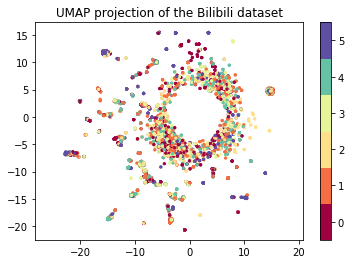

In [83]:
word_doc_matrix = vectorizer.fit_transform(documents)
embeddings = umap.UMAP(random_state=42, n_components=2, metric = 'hellinger').fit_transform(word_doc_matrix)
# embeddings = reducer.fit(word_doc_matrix)
visualize_embeddings(classify, embeddings, 'UMAP projection of the Bilibili dataset')